In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pickle

import sys
sys.path.insert(1, '../../')
from utils import *

In [2]:
plt.rcParams.update({'font.size': 13})

## Functions:

## Parameters

In [3]:
#dataset = 'hospital'
dataset = 'high_school'
#dataset = 'conference'
#dataset = 'workplace'
#dataset = 'pr_school'

In [4]:
weighted = True

In [5]:
mu = 0.1

In [6]:
mu = 0.1
betaT = 0
if dataset == 'hospital':
    #beta_range = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    #R0_range = [1.20,1.53,1.77,2,2.22,2.38,2.56,2.7]
    beta_range = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    R0_range = [1.53,1.77,2,2.22,2.38,2.56,2.7]
    
elif dataset == 'high_school':
    beta_range = [0.7,0.75,0.8,0.85,0.9,0.95,1.0]
    R0_range = [1.55,1.63,1.71,1.79,1.83,1.86,1.89]

elif dataset == 'workplace':
    beta_range = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    R0_range = [1.26,1.55,1.82,2.06,2.22,2.40,2.62]

elif dataset == 'conference':
    beta_range = [0.6,0.7,0.75,0.8,0.85,0.9,1]
    R0_range = [1.21,1.37,1.46,1.49,1.60,1.66,1.74]
    
elif dataset == 'pr_school':
    beta_range = [0.12,0.15,0.18,0.21,0.24,0.27,0.3,0.33,0.36]
    R0_range = [1.40,1.65,1.97,2.11,2.31,2.48,2.68,2.84,3.01]
    #beta_range = [0.21,0.24,0.27,0.3,0.33,0.36]
    #R0_range = [2.11,2.31,2.48,2.68,2.84,3.01]

In [7]:
if dataset == 'pr_school':
    minValue_dataset = 0.9358202971633636
    maxValue_dataset = 0.9980819653892196
elif dataset == 'hospital':
    minValue_dataset = 0.9598073270715547
    maxValue_dataset = 0.9977529359030632
elif dataset == 'workplace':
    minValue_dataset = 0.9385573029069428
    maxValue_dataset = 0.9993494022439595
elif dataset == 'high_school':
    minValue_dataset = 0.9773412083701526 
    maxValue_dataset = 0.9969046147793836
elif dataset == 'conference':
    minValue_dataset = 0.9686355970282393 
    maxValue_dataset = 0.9967021042518226

In [8]:
C_list = []
for beta in beta_range:
    filename = "results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_0.000_mu_%.2f_init_1.csv"%(dataset,beta,mu)
    C = load_C_mean(filename)
    C_list.append(C)

In [9]:
S = np.full((len(beta_range),len(beta_range)),0.0)
for i in range(len(beta_range)-1):
    for j in range(i+1,len(beta_range)):
        S[i,j] = cos_sim(C_list[i],C_list[j])

In [10]:
figname = '../figs/cos_sim_%s_mu_%.2f.pdf'%(dataset,mu)

0.9773412083701526 0.9936763824313891
../figs/cos_sim_high_school_mu_0.10.pdf.pdf


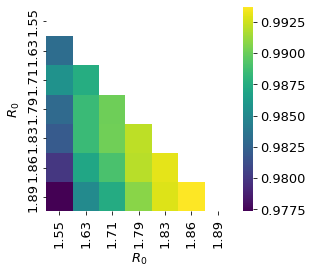

In [11]:
plot_sim(S, mu, R0_range, ax_label='$R_0$', save=True, figname=figname,
         scale='independent',min_scale = minValue_dataset,max_scale = maxValue_dataset)

0.9773412083701526 0.9969046147793836
../figs/cos_sim_high_school_mu_0.10.pdf_colorscale.pdf


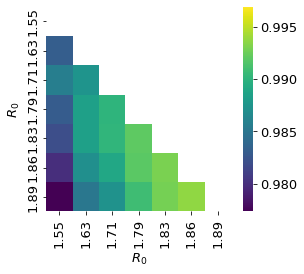

In [12]:
plot_sim(S, mu, R0_range, ax_label='$R_0$', save=True, figname=figname,
         scale='fixed',min_scale = minValue_dataset,max_scale = maxValue_dataset)